# Mixing Fluids - The Hybrid case

In [9]:
root_path  = "/home/user/PHARE/fluid_kinetic_class/2024/run/blob"
phare_path = "/home/user/PHARE/"

In [10]:
import os
import sys
phare_root = os.path.expanduser(phare_path)
sys.path.append(os.path.join(phare_root, "pyphare"))
sys.path.append(os.path.join(phare_path, "fluid_kinetic_class/2024/"))

from pyphare.pharesee.run import Run
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d as gf
from numpy import polyfit
from scipy.signal import find_peaks
from scripts import dist_plot

%matplotlib widget

## Goal

You will execute 4 runs.\
The first two runs only differ by the electron temperature, and have the magnetic field along the x axis

- $T_e = 0.25$,  $T_i=0.125$, $\mathbf{B} = B_x$
- $T_e = 0.025$, $T_i=0.125$, $\mathbf{B} = B_x$

The second couple of runs again tests the two sets to electron temperatures, but this time the magnetic field is along the $y$ axis

- $T_e = 0.25$,  $T_i=0.125$, $\mathbf{B} = B_y$
- $T_e = 0.025$,  $T_i=0.125$, $\mathbf{B} = B_y$

## Run PHARE

- Open a terminal (File>New>Terminal)
- execute `pwd`, you should see `/home/user/PHARE` indicating you're in the PHARE directory
- execute `git clone https://github.com/PHAREHUB/fluid_kinetic_class`
- execute `cd fluid_kinetic_class/2024/run/blob/`


In there you will see a script called `blob.py` that will configure a PHARE simulation for you.\
To run it :

```bash
python3 sp.py Te Ti bx by
```

for instance: 

```bash
python3 sp.py 0.25 0.125 1.0 0.0
```

This should run and produce outputs in the directory:

- `wp_0.25_0.025_1.0_0.0/`


To run the analysis for a specific run you did, execute cells below after changing the value of the variable  `Te`, `Ti`, `bx`and `by` to the one associated with the run you want to see.



# Analysis

In [119]:
Te = 0.025
Ti = 0.125
bx = 1.0
by = 0.0
case_name = f"blob_{Te}_{Ti}_{bx}_{by}"
path = f"{root_path}/{case_name}"
r = Run(path)

In [120]:
t = 25
Vi = r.GetVi(t)
Ni = r.GetNi(t)
B = r.GetB(t)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '$N_i$'}, xlabel='x', ylabel='y'>)

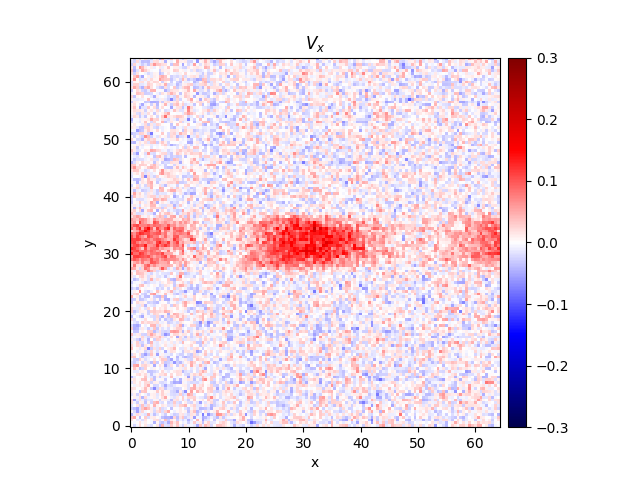

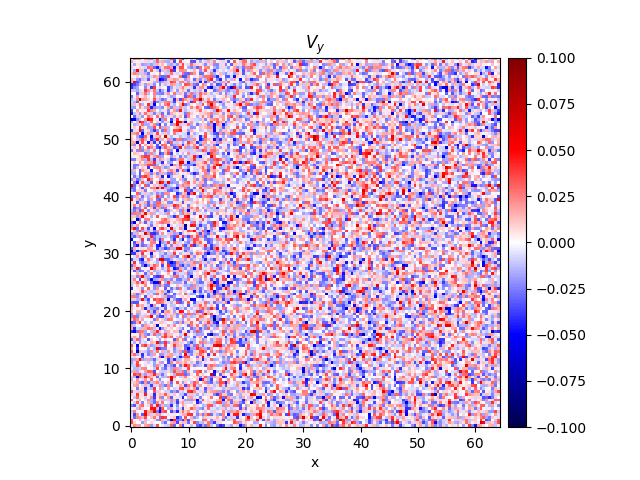

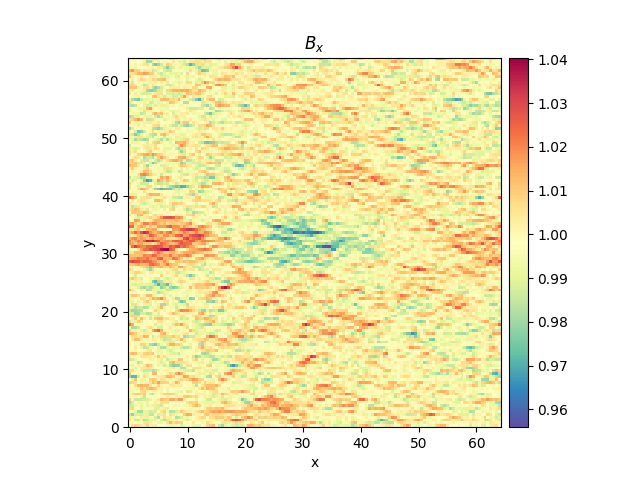

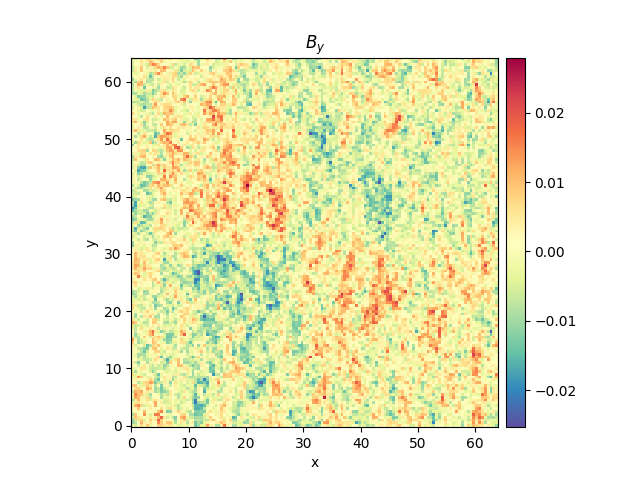

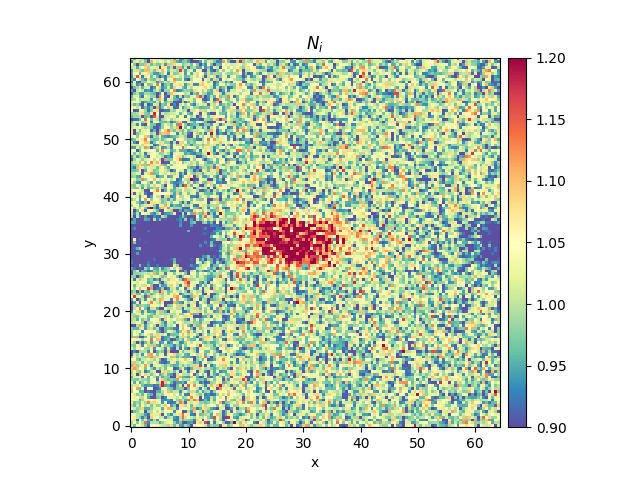

In [121]:
Vi.Vx.plot(vmin=-0.3, vmax=0.3, cmap="seismic", title=r"$V_x$")
Vi.Vy.plot(vmin=-0.1, vmax=0.1, cmap="seismic", title=r"$V_y$")
B.Bx.plot(title=r"$B_x$")
B.By.plot(title=r"$B_y$")
Ni.plot(vmin=0.9, vmax=1.2, title=r"$N_i$")

# Make a movie

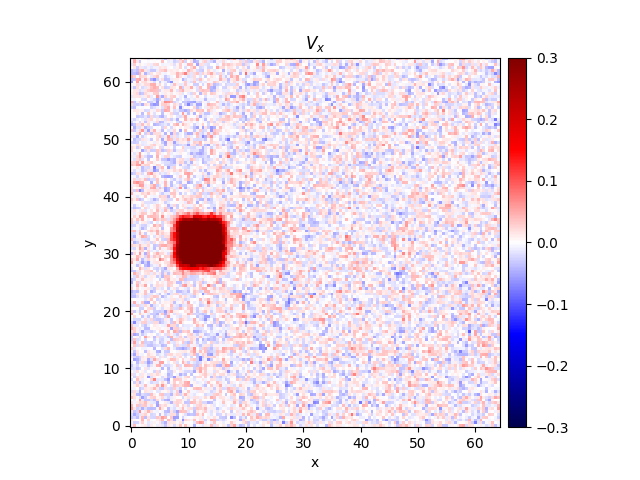

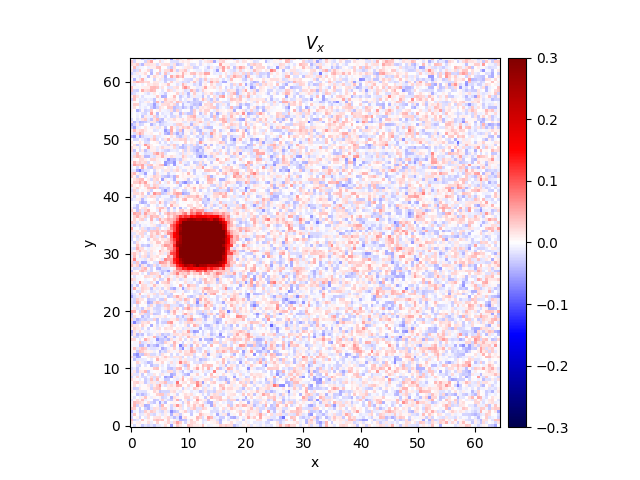

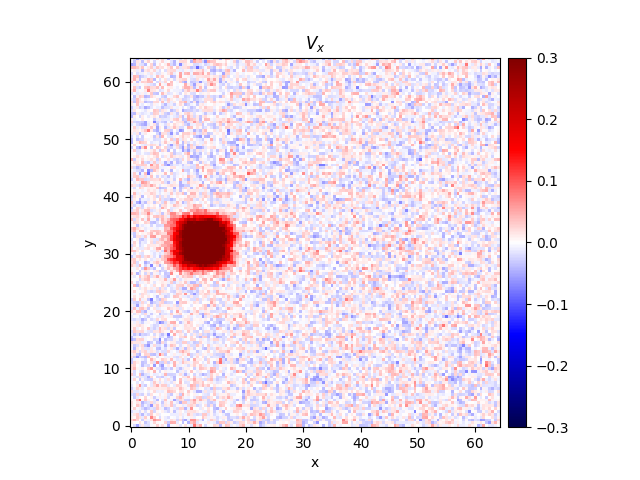

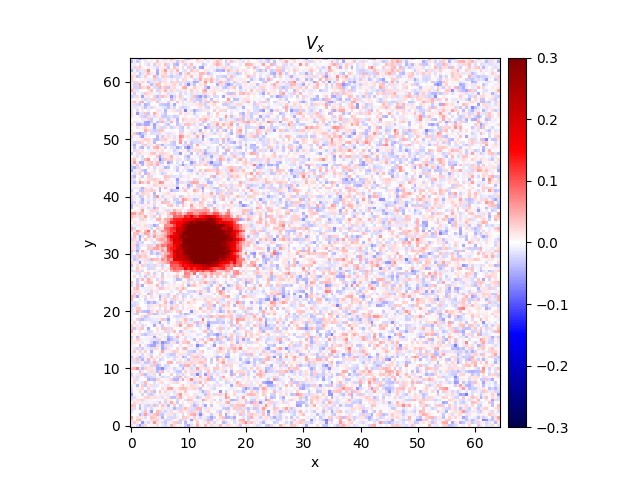

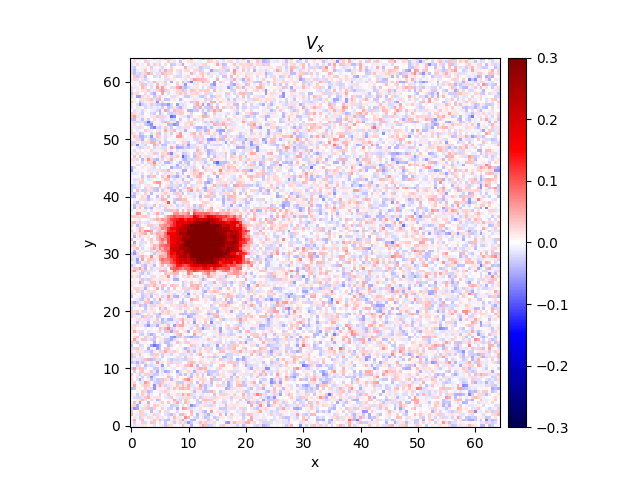

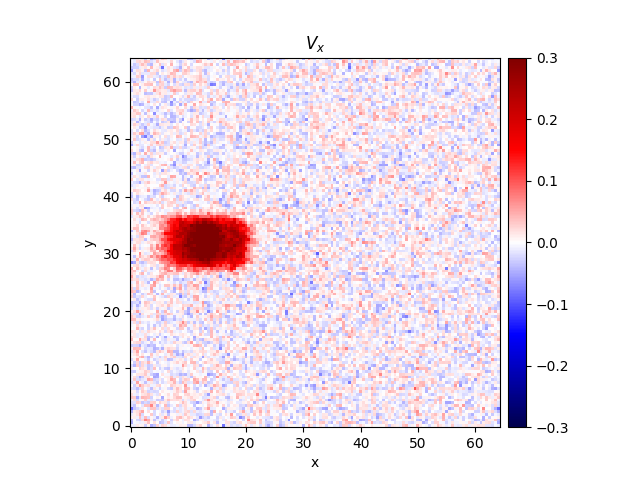

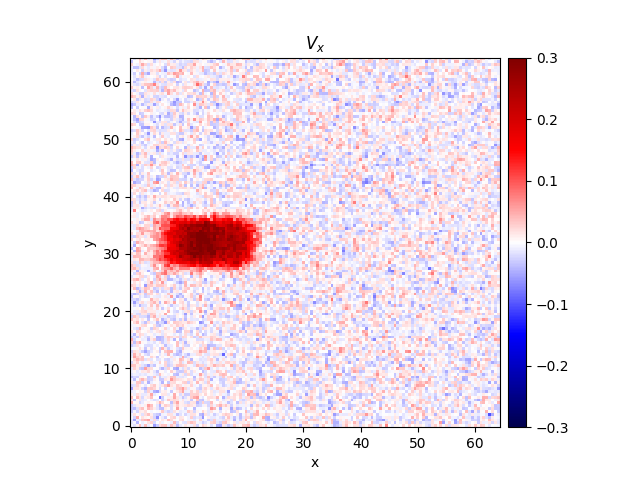

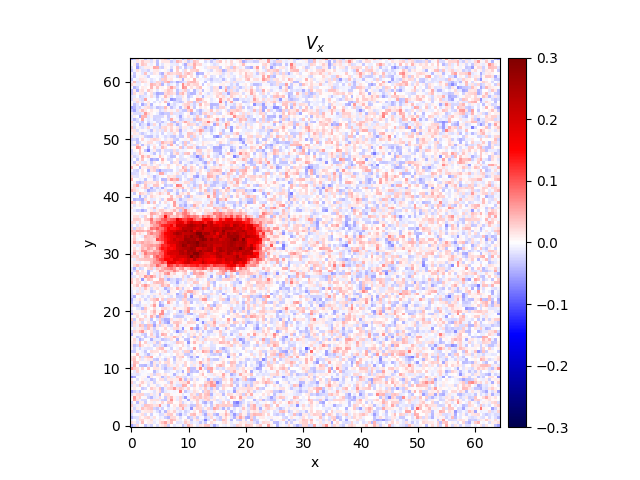

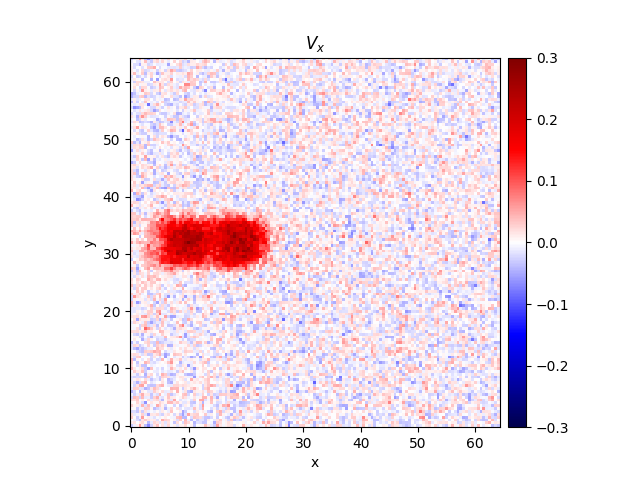

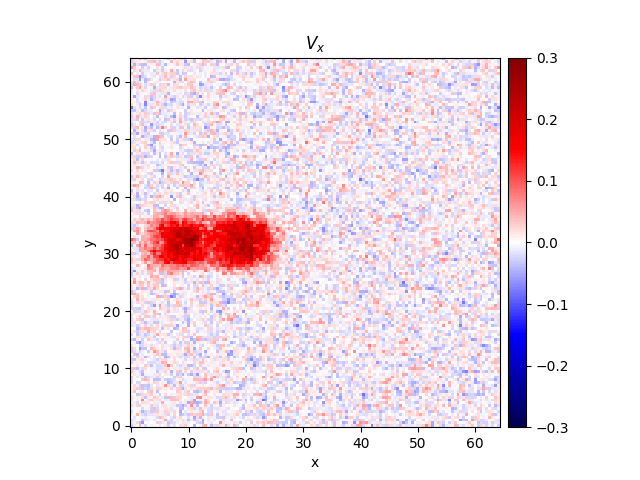

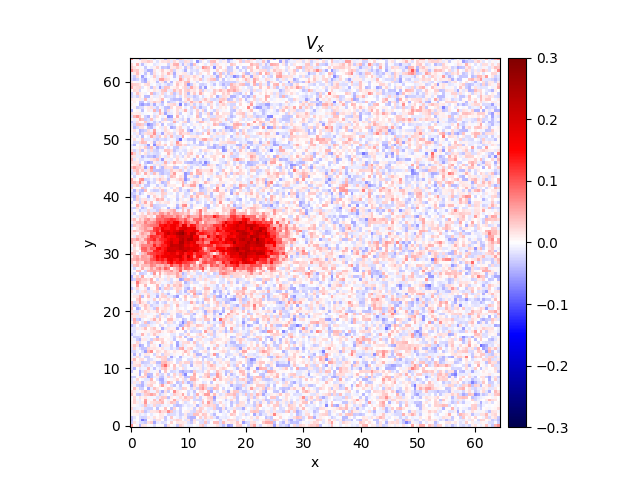

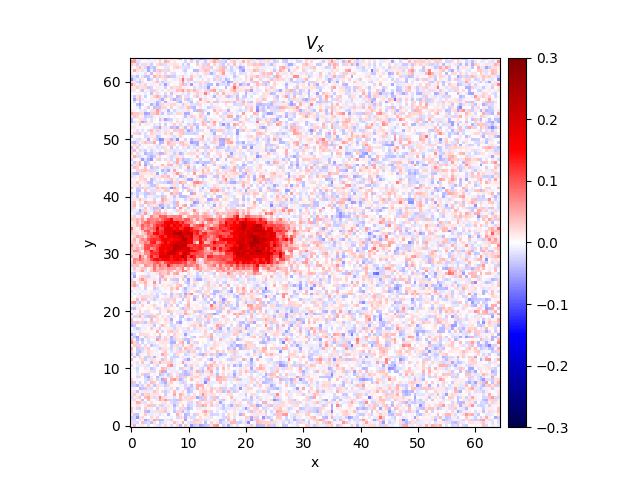

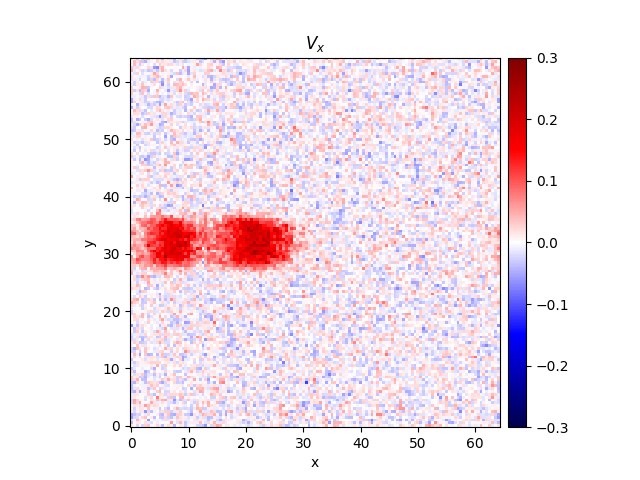

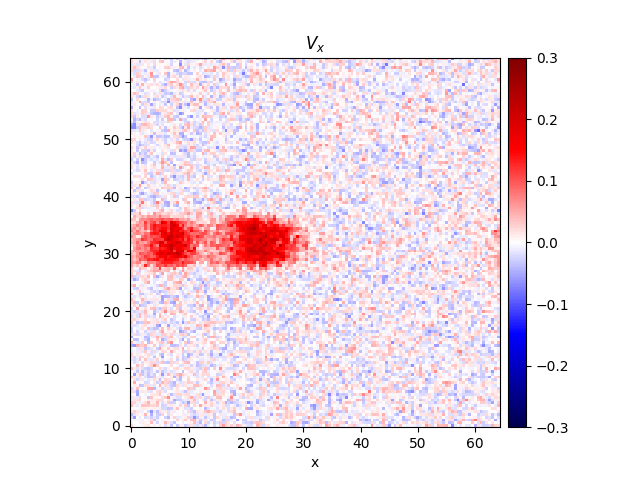

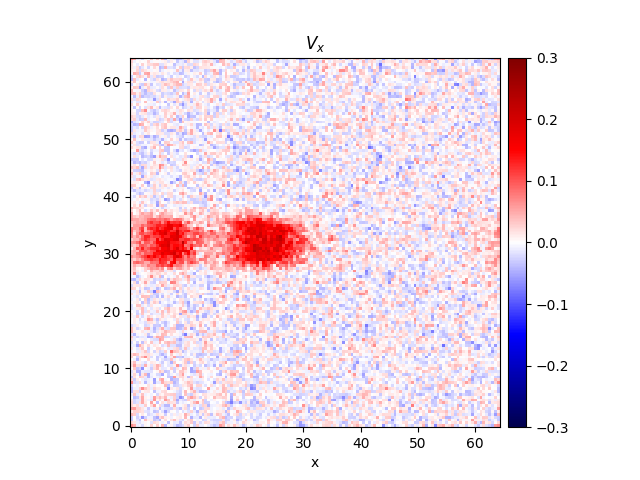

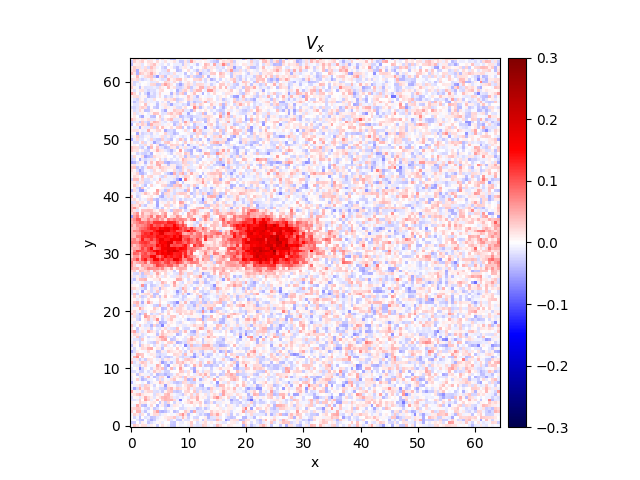

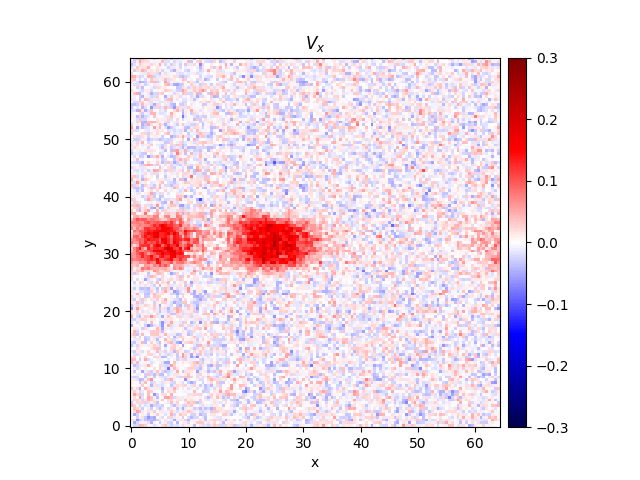

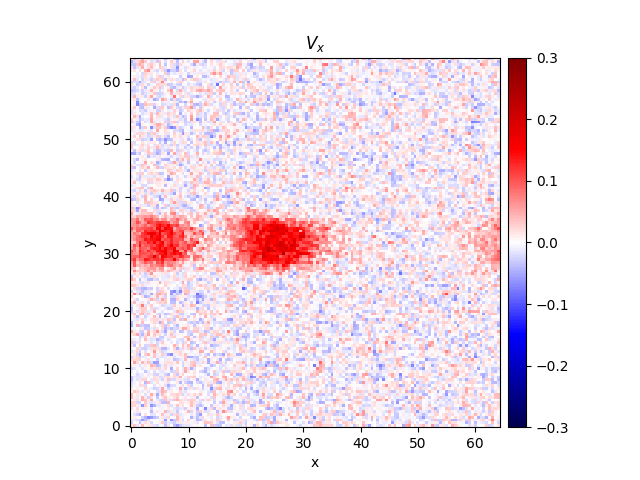

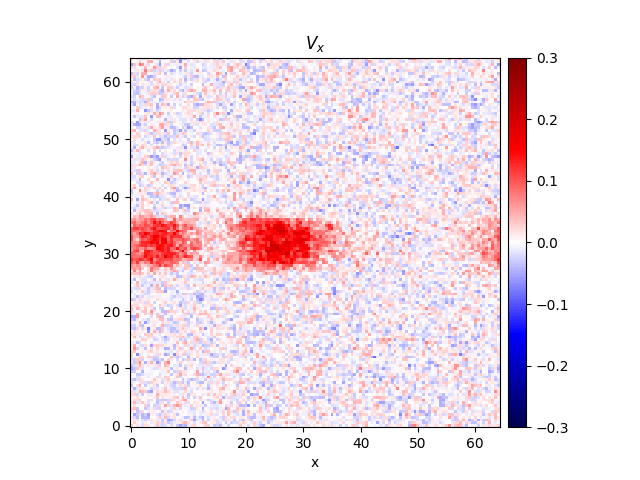

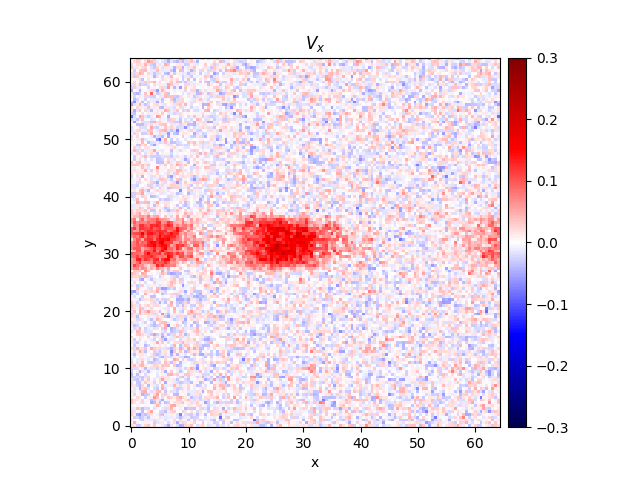

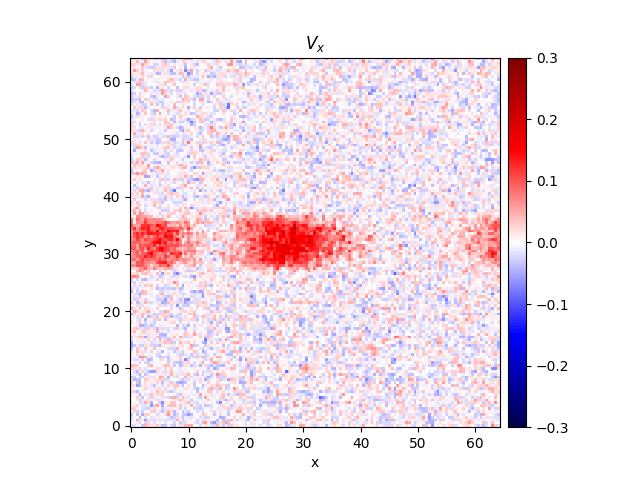

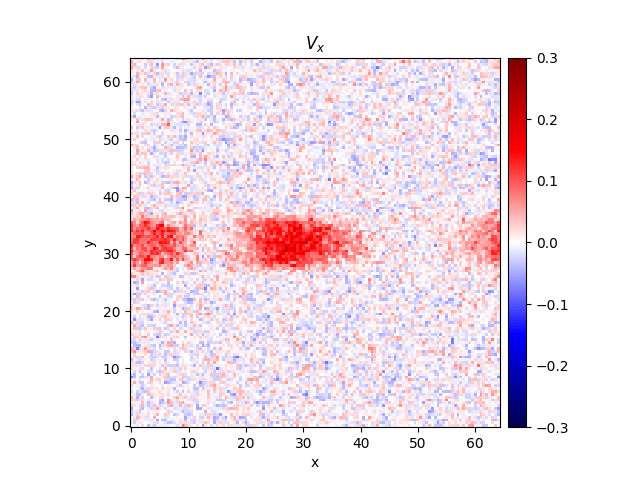

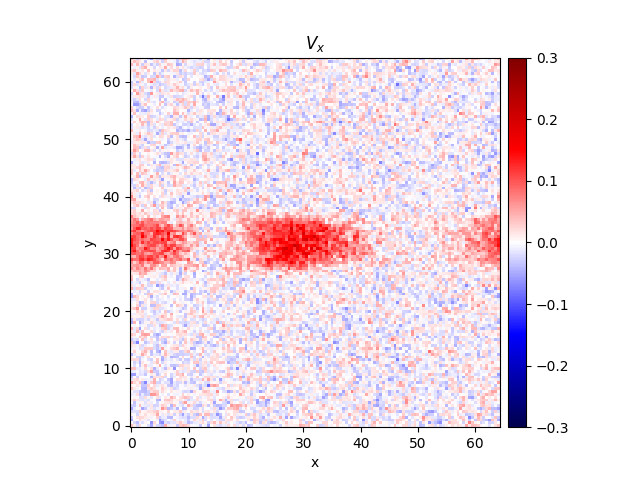

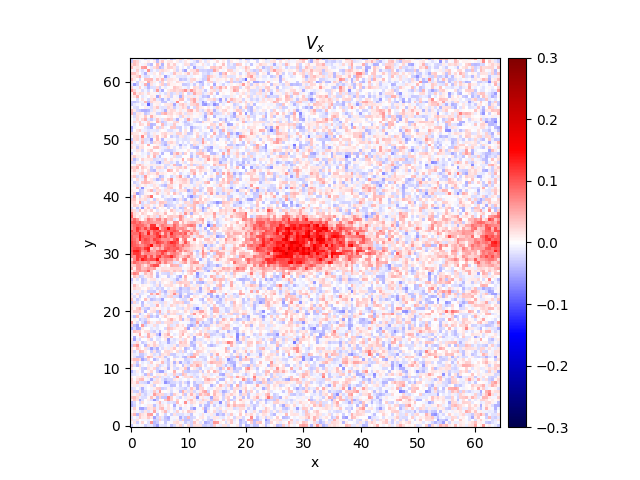

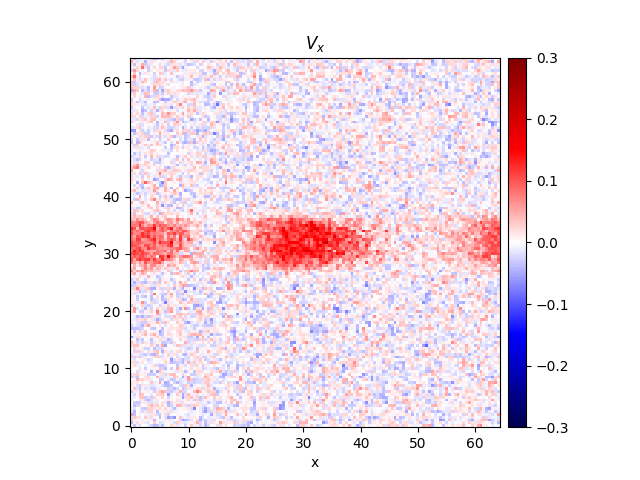

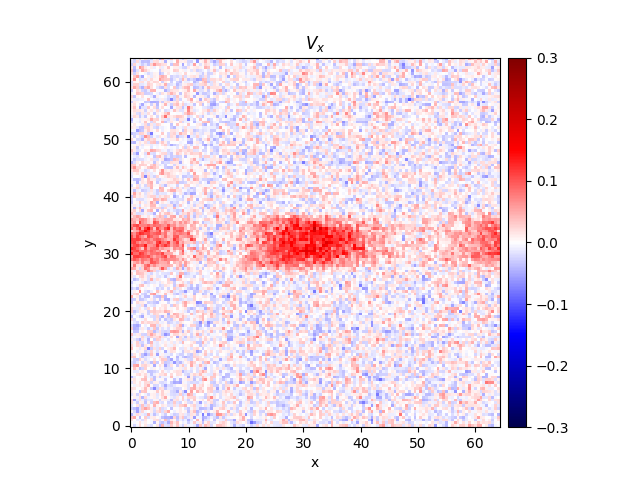

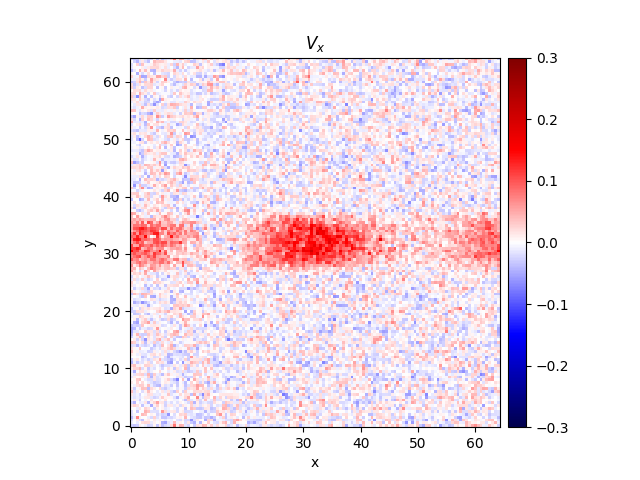

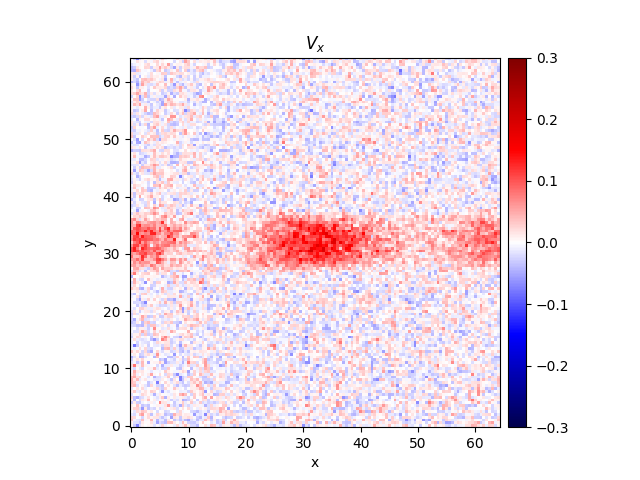

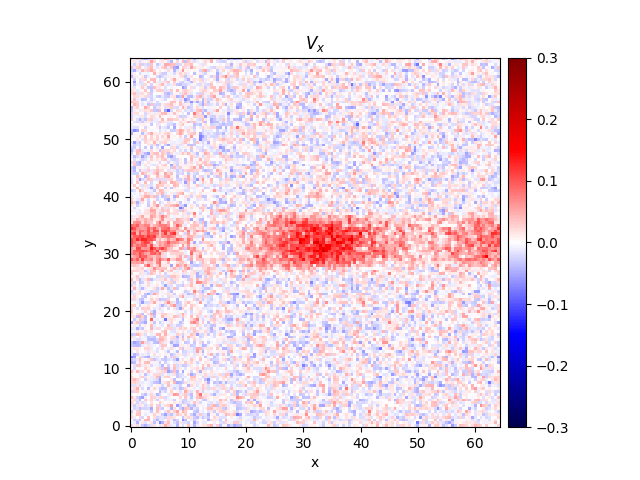

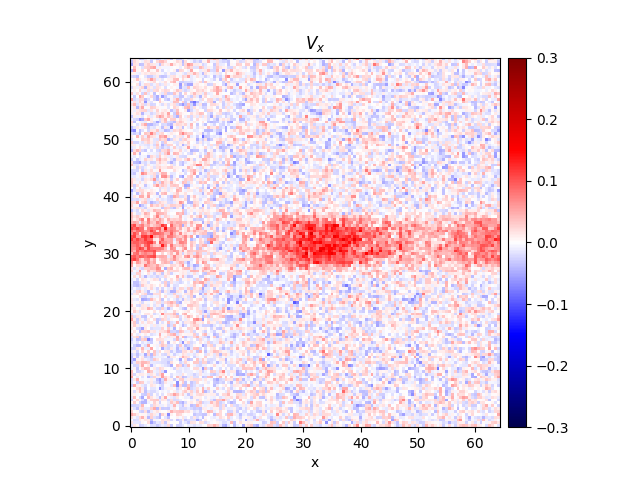

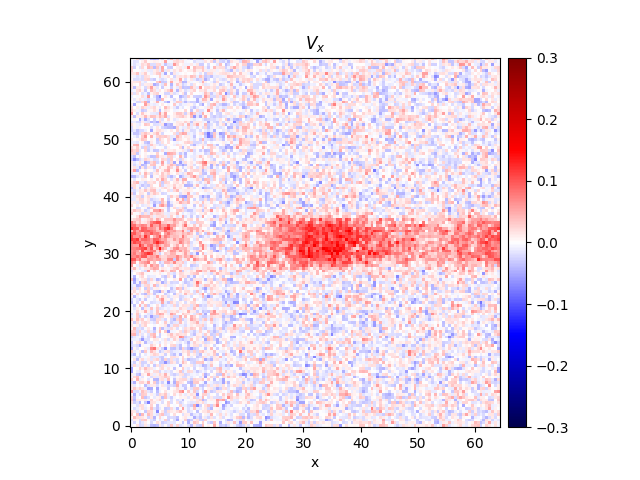

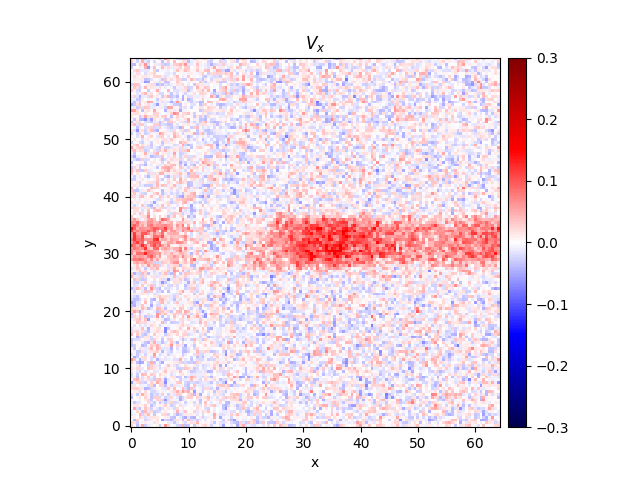

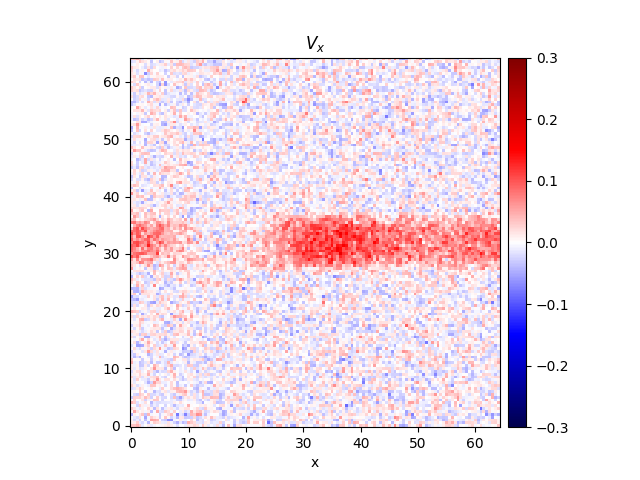

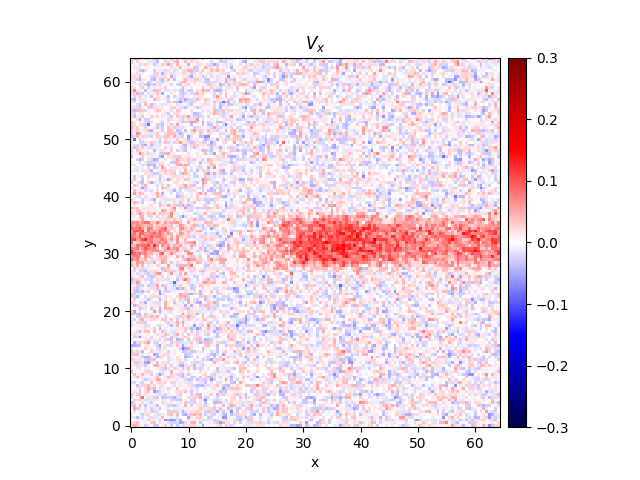

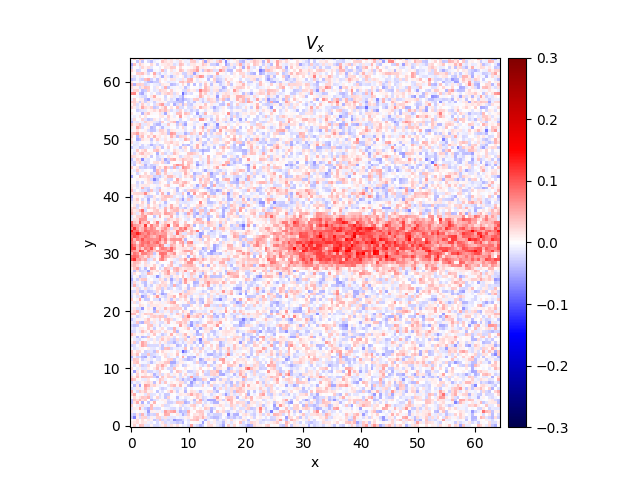

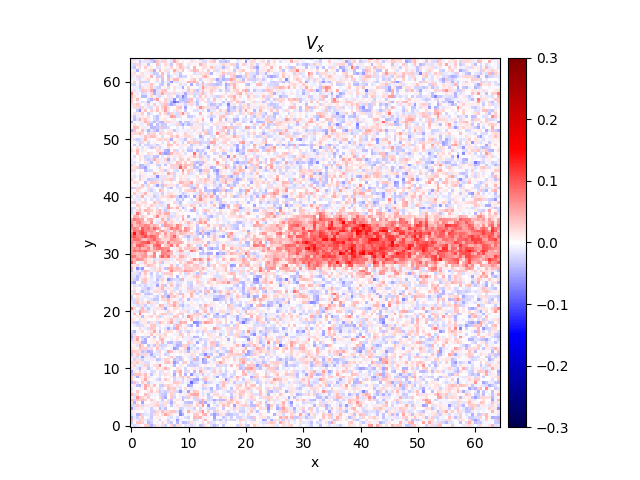

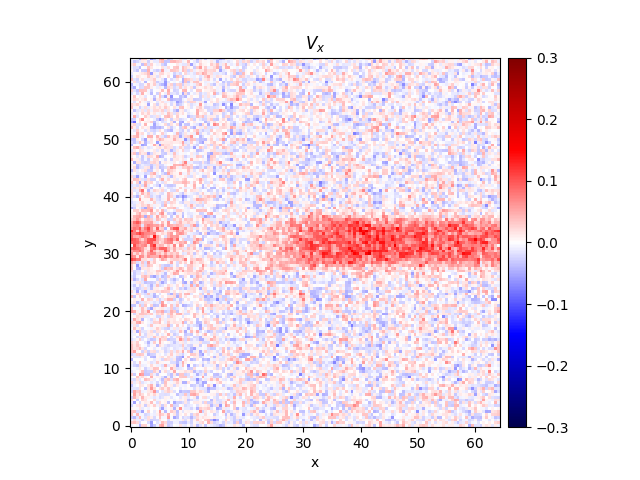

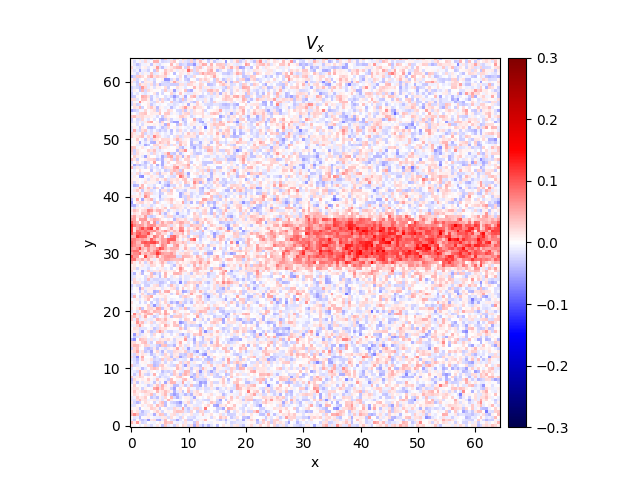

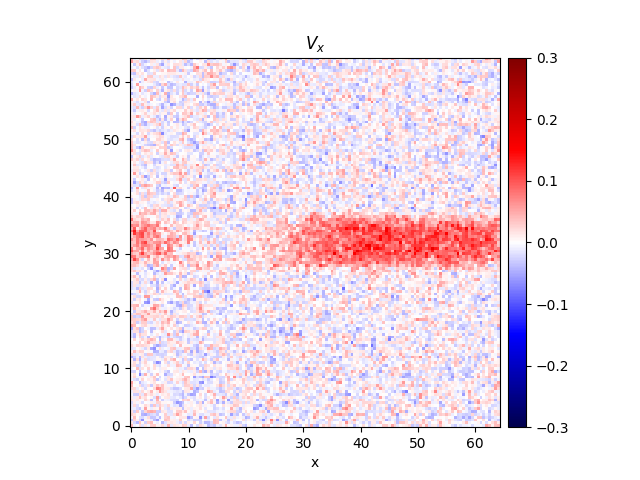

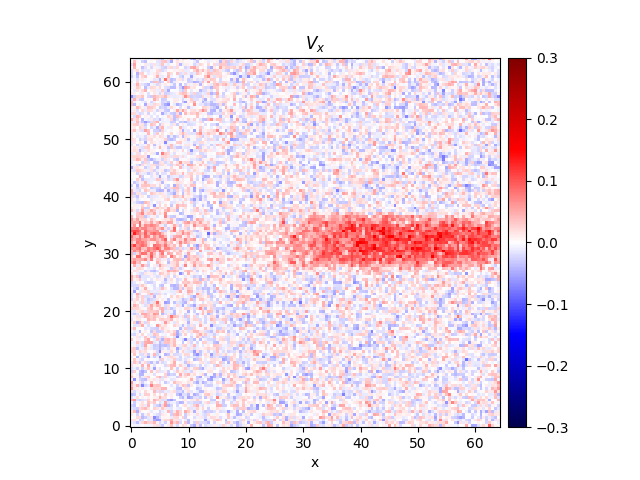

In [122]:

fig, ax = plt.subplots(10,10)
for it, t in enumerate(np.arange(0,40,1)):
    Vi = r.GetVi(t)
    Vi.Vx.plot(vmin=-0.3,
               vmax=0.3,
               cmap="seismic",
               title=r"$V_x$",
               filename="{}_{:04d}.png".format(case_name, it),
               
              )
    plt.close(fig)

In [126]:
!ffmpeg -r 24 -y -i blob_0.025_0.125_0.0_1.0_%04d.png -b:v 18000k -pix_fmt yuv420p blob_by_Te0.025.mp4

ffmpeg version 4.3.6-0+deb11u1 Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 10 (Debian 10.2.1-6)
  configuration: --prefix=/usr --extra-version=0+deb11u1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab 